In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
from pandas.tseries.holiday import USFederalHolidayCalendar as calander
import warnings
warnings.filterwarnings("ignore")

import pyarrow.parquet as pq
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
yellow_01 = pq.read_table(source='/content/drive/Othercomputers/My PC/FIT5147-Data exploration and visualisation/Assessments/A1/yellow_tripdata_2023-01.parquet').to_pandas().rename(columns=str.lower)
yellow_02 = pq.read_table(source='/content/drive/Othercomputers/My PC/FIT5147-Data exploration and visualisation/Assessments/A1/yellow_tripdata_2023-02.parquet').to_pandas().rename(columns=str.lower)
yellow_03 = pq.read_table(source='/content/drive/Othercomputers/My PC/FIT5147-Data exploration and visualisation/Assessments/A1/yellow_tripdata_2023-03.parquet').to_pandas().rename(columns=str.lower)
yellow_04 = pq.read_table(source='/content/drive/Othercomputers/My PC/FIT5147-Data exploration and visualisation/Assessments/A1/yellow_tripdata_2023-04.parquet').to_pandas().rename(columns=str.lower)
yellow_05 = pq.read_table(source='/content/drive/Othercomputers/My PC/FIT5147-Data exploration and visualisation/Assessments/A1/yellow_tripdata_2023-05.parquet').to_pandas().rename(columns=str.lower)
yellow_06 = pq.read_table(source='/content/drive/Othercomputers/My PC/FIT5147-Data exploration and visualisation/Assessments/A1/yellow_tripdata_2023-06.parquet').to_pandas().rename(columns=str.lower)
yellow_07 = pq.read_table(source='/content/drive/Othercomputers/My PC/FIT5147-Data exploration and visualisation/Assessments/A1/yellow_tripdata_2023-07.parquet').to_pandas().rename(columns=str.lower)
yellow_08 = pq.read_table(source='/content/drive/Othercomputers/My PC/FIT5147-Data exploration and visualisation/Assessments/A1/yellow_tripdata_2023-08.parquet').to_pandas().rename(columns=str.lower)
yellow_09 = pq.read_table(source='/content/drive/Othercomputers/My PC/FIT5147-Data exploration and visualisation/Assessments/A1/yellow_tripdata_2023-09.parquet').to_pandas().rename(columns=str.lower)
yellow_10 = pq.read_table(source='/content/drive/Othercomputers/My PC/FIT5147-Data exploration and visualisation/Assessments/A1/yellow_tripdata_2023-10.parquet').to_pandas().rename(columns=str.lower)
yellow_11 = pq.read_table(source='/content/drive/Othercomputers/My PC/FIT5147-Data exploration and visualisation/Assessments/A1/yellow_tripdata_2023-11.parquet').to_pandas().rename(columns=str.lower)
# 12 2022
yellow_12 = pq.read_table(source='/content/drive/Othercomputers/My PC/FIT5147-Data exploration and visualisation/Assessments/A1/yellow_tripdata_2022-12.parquet').to_pandas().rename(columns=str.lower)

In [ ]:
# combine the monthly data as a season
# waitttt, should i take december of previous year? else i'll just put an assumption?
# W - D to F, Sp - M to may, Sum - June, july, aug, Autum - Sept to nov
winter = pd.concat([yellow_12, yellow_01, yellow_02]).reset_index(drop=True)#.rename(columns=str.lower, inplace = True)
summer = pd.concat([yellow_06, yellow_07, yellow_08]).reset_index(drop=True)#.rename(columns=str.lower, inplace = True)
spring = pd.concat([yellow_03, yellow_04, yellow_05]).reset_index(drop=True)#.rename(columns=str.lower, inplace = True)
autumn = pd.concat([yellow_09, yellow_10, yellow_11]).reset_index(drop=True)#.rename(columns=str.lower, inplace = True)

In [58]:
yellow_01

,vendorid,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecodeid,store_and_fwd_flag,pulocationid,dolocationid,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.30,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.90,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.90,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.10,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.40,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3066761,2,2023-01-31 23:58:34,2023-02-01 00:12:33,NaN,3.05,NaN,None,107,48,0,15.80,0.00,0.5,3.96,0.0,1.0,23.76,NaN,NaN
3066762,2,2023-01-31 23:31:09,2023-01-31 23:50:36,NaN,5.80,NaN,None,112,75,0,22.43,0.00,0.5,2.64,0.0,1.0,29.07,NaN,NaN
3066763,2,2023-01-31 23:01:05,2023-01-31 23:25:36,NaN,4.67,NaN,None,114,239,0,17.61,0.00,0.5,5.32,0.0,1.0,26.93,NaN,NaN
3066764,2,2023-01-31 23:40:00,2023-01-31 23:53:00,NaN,3.15,NaN,None,230,79,0,18.15,0.00,0.5,4.43,0.0,1.0,26.58,NaN,NaN


In [5]:
# labeling dataset as winter and summer
winter['season'] = 'winter'
summer['season'] = 'summer'
spring['season'] = 'spring'
autumn['season'] = 'autumn'

In [62]:
winter

,vendorid,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecodeid,store_and_fwd_flag,pulocationid,dolocationid,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,season
0,1,2022-12-01 00:37:35,2022-12-01 00:47:35,1.0,2.00,1.0,N,170,237,1,8.50,3.00,0.5,3.10,0.0,0.3,15.40,2.5,0.00,winter
1,1,2022-12-01 00:34:35,2022-12-01 00:55:21,0.0,8.40,1.0,N,138,141,2,26.00,4.25,0.5,0.00,0.0,0.3,31.05,2.5,1.25,winter
2,1,2022-12-01 00:33:26,2022-12-01 00:37:34,1.0,0.80,1.0,N,140,140,1,5.00,3.00,0.5,1.76,0.0,0.3,10.56,2.5,0.00,winter
3,1,2022-12-01 00:45:51,2022-12-01 00:53:16,1.0,3.00,1.0,N,141,79,3,10.00,3.00,0.5,0.00,0.0,0.3,13.80,2.5,0.00,winter
4,2,2022-12-01 00:49:49,2022-12-01 00:54:13,1.0,0.76,1.0,N,261,231,1,5.00,0.50,0.5,1.76,0.0,0.3,10.56,2.5,0.00,winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9380265,2,2023-02-28 23:46:00,2023-03-01 00:05:00,NaN,4.65,NaN,None,249,140,0,20.22,0.00,0.5,4.84,0.0,1.0,29.06,NaN,NaN,winter
9380266,2,2023-02-28 23:26:02,2023-02-28 23:37:10,NaN,2.47,NaN,None,186,79,0,13.66,0.00,0.5,2.65,0.0,1.0,20.31,NaN,NaN,winter
9380267,2,2023-02-28 23:24:00,2023-02-28 23:38:00,NaN,3.49,NaN,None,158,143,0,17.64,0.00,0.5,0.00,0.0,1.0,21.64,NaN,NaN,winter
9380268,2,2023-02-28 23:03:00,2023-02-28 23:10:00,NaN,2.13,NaN,None,79,162,0,13.56,0.00,0.5,2.63,0.0,1.0,20.19,NaN,NaN,winter


In [6]:
#data = pd.concat([winter, spring, summer, autumn]).reset_index(drop=True)

In [7]:
# remove any invalid date
winter = winter[(winter['tpep_pickup_datetime'] >= '2022-12-01 00:00:00')
    & (winter['tpep_pickup_datetime'] <= '2023-02-28 23:59:59')
    & (winter['tpep_dropoff_datetime'] >= '2022-12-01 00:00:00')
    & (winter['tpep_dropoff_datetime'] <= '2023-02-28 23:59:59')]
summer = summer[(summer['tpep_pickup_datetime'] >= '2023-06-01 00:00:00')
    & (summer['tpep_pickup_datetime'] <= '2023-08-31 23:59:59')
    & (summer['tpep_dropoff_datetime'] >= '2023-06-01 00:00:00')
    & (summer['tpep_dropoff_datetime'] <= '2023-08-31 23:59:59')]
spring = spring[(spring['tpep_pickup_datetime'] >= '2023-03-01 00:00:00')
    & (spring['tpep_pickup_datetime'] <= '2023-05-31 23:59:59')
    & (spring['tpep_dropoff_datetime'] >= '2023-03-01 00:00:00')
    & (spring['tpep_dropoff_datetime'] <= '2023-05-31 23:59:59')]
autumn = autumn[(autumn['tpep_pickup_datetime'] >= '2023-09-01 00:00:00')
    & (autumn['tpep_pickup_datetime'] <= '2023-11-30 23:59:59')
    & (autumn['tpep_dropoff_datetime'] >= '2023-09-01 00:00:00')
    & (autumn['tpep_dropoff_datetime'] <= '2023-11-30 23:59:59')]

In [53]:
data = pd.concat([winter, spring, summer, autumn]).reset_index(drop=True)

In [8]:
data['season'].value_counts()

season
spring    10205665
autumn     9708722
winter     9380270
summer     9038551
Name: count, dtype: int64

 passenger_count, ratecodeid, store_and_fwd_flag, congestion_surcharge, and airport_fee have consistently 1,309,356 missing values each, indicating a systematic issue or pattern in data collection or entry. Given this uniformity in missing data across multiple critical fields, removing all rows with null values is justified to ensure the analysis is performed on complete and accurate records, avoiding skewed results due to extensive and evenly distributed missing information.

In [7]:
data.dropna()

,vendorid,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecodeid,store_and_fwd_flag,pulocationid,dolocationid,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,season
0,1,2022-12-01 00:37:35,2022-12-01 00:47:35,1.0,2.00,1.0,N,170,237,1,8.5,3.00,0.5,3.10,0.0,0.3,15.40,2.5,0.00,winter
1,1,2022-12-01 00:34:35,2022-12-01 00:55:21,0.0,8.40,1.0,N,138,141,2,26.0,4.25,0.5,0.00,0.0,0.3,31.05,2.5,1.25,winter
2,1,2022-12-01 00:33:26,2022-12-01 00:37:34,1.0,0.80,1.0,N,140,140,1,5.0,3.00,0.5,1.76,0.0,0.3,10.56,2.5,0.00,winter
3,1,2022-12-01 00:45:51,2022-12-01 00:53:16,1.0,3.00,1.0,N,141,79,3,10.0,3.00,0.5,0.00,0.0,0.3,13.80,2.5,0.00,winter
4,2,2022-12-01 00:49:49,2022-12-01 00:54:13,1.0,0.76,1.0,N,261,231,1,5.0,0.50,0.5,1.76,0.0,0.3,10.56,2.5,0.00,winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38200528,2,2023-11-30 23:26:49,2023-11-30 23:46:19,1.0,2.63,1.0,N,164,142,1,19.1,1.00,0.5,6.03,0.0,1.0,30.13,2.5,0.00,autumn
38200529,2,2023-11-30 23:48:40,2023-12-01 00:03:45,2.0,2.18,1.0,N,143,164,1,14.9,1.00,0.5,3.98,0.0,1.0,23.88,2.5,0.00,autumn
38200530,1,2023-11-30 23:34:00,2023-11-30 23:46:33,1.0,2.20,1.0,N,148,170,1,14.9,3.50,0.5,3.98,0.0,1.0,23.88,2.5,0.00,autumn
38200531,2,2023-11-30 23:48:20,2023-11-30 23:54:32,1.0,1.16,1.0,N,148,87,1,8.6,1.00,0.5,2.72,0.0,1.0,16.32,2.5,0.00,autumn


In [8]:
data = data.drop_duplicates(keep='first')

In [9]:
# extract day and time, the calculate the duration of the trip
data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'])
data['tpep_dropoff_datetime'] = pd.to_datetime(data['tpep_dropoff_datetime'])
# Extracting the date from tpep_pickup_datetime
data['date'] = data['tpep_pickup_datetime'].dt.normalize()
# Extracting the month, year, time, weekday from date
data['month'] = data['date'].dt.normalize().dt.month
data['year'] = data['date'].dt.normalize().dt.year
data['time'] = data['tpep_pickup_datetime'].dt.hour
data['weekday'] = data['date'].dt.day_name()
# Extracting the duration of the taxi trip
data['duration'] = data['tpep_dropoff_datetime'] - data['tpep_pickup_datetime']
data['duration'] = data['duration'] / np.timedelta64(1, 'm')

In [ ]:
# identifying holidays
cal = calander()
holidays = cal.holidays(start='2023-01-01', end='2023-12-31')
data['holiday'] = data['date'].isin(holidays)
data['week'] = data['date'].dt.dayofweek
data.loc[data['week'] >= 5, 'day_type'] = "weekend" # creating date_type col based on conditions
data.loc[data['week'] < 5, 'day_type'] = "workday"
data.loc[data['holiday'] == True, 'day_type'] = "holiday"
data = data.drop(['holiday', 'week'], axis=1)

In [13]:
# calculate tip percentage using tip amount and total amount
data['tip_percent'] = (data.tip_amount / data.total_amount) * 100

In [14]:
# classify a trip's time slot

def time_slots(x):
    if x in range(6,12):
        return 'Morning'
    elif x in range(12,17):
        return 'Afternoon'
    elif x in range(17,22):
        return 'Evening'
    else:
        return 'Late Night'

data['time_desc'] = data['time'].apply(time_slots)

In [18]:
data.columns

Index(['vendorid', 'passenger_count', 'trip_distance', 'ratecodeid',
       'pulocationid', 'dolocationid', 'payment_type', 'fare_amount',
       'tip_amount', 'tolls_amount', 'total_amount', 'congestion_surcharge',
       'airport_fee', 'season', 'date', 'month', 'year', 'time', 'weekday',
       'duration', 'day_type', 'tip_percent', 'time_desc'],
      dtype='object')

In [17]:
# drop features that we are not interested in
data = data.drop(['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'store_and_fwd_flag', 'extra', 'mta_tax', 'improvement_surcharge'], axis=1)

KeyError: "['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'store_and_fwd_flag', 'extra', 'mta_tax', 'improvement_surcharge'] not found in axis"

In [16]:
# Conditions to reduce the complexity

# Reducing the passenger count to 7
data = data[(data['passenger_count'] > 0) & (data['passenger_count'] < 7)]

# Excluding trip_distance <= 100 miles
data = data[(data['trip_distance'] > 0) & (data['trip_distance'] <= 100)]

# Excluding duration longer than 180 mins
data = data[(data['duration'] > 0) & (data['duration'] <= 180)]

# Removing payment method other than cash and credit card
data = data[(data['payment_type'] != 3) & (data['payment_type'] != 4) & (data['payment_type'] != 5) & (data['payment_type'] != 6)]

# Excluding the records with fare amount less than 4.5
data = data[(data['fare_amount'] >= 4.5) & (data['fare_amount'] <= 250)]

# Removing trips with tip precentage over 50%
data = data[(data['tip_percent'] >= 0) & (data['tip_percent'] <= 50)]

# PU and DO location id not within NYC taxi zone
data = data[(data['pulocationid'] >= 1) & (data['pulocationid'] <= 263) & (data['dolocationid'] >= 1) & (data['dolocationid'] <= 263)]


In [17]:
# Converting passenger count into three levels
def passenger_convert(row):
    if (row >= 1) & (row <= 2):
        val = "small"
    elif (row > 2) & (row < 5):
        val = "medium"
    else:
        val = "high"
    return val

data['passenger_count_levels'] = data['passenger_count'].apply(passenger_convert)

In [18]:
data = data[['pulocationid', 'dolocationid', 'passenger_count','season', 'date', 'month', 'year', 'time', 'weekday', 'duration', 'day_type', 'time_desc',
       'passenger_count_levels']]

In [19]:
# # Weather dataset
weather = pd.read_csv('/content/drive/Othercomputers/My PC/FIT5147-Data exploration and visualisation/Assessments/A1/3678137_22_23.csv')
weather['TAVG'] = (weather['TMAX'] + weather['TMIN']) / 2
# Converting F to C
# https://dev.to/mindninjax/how-to-build-an-fahrenheit-to-celsius-converter-in-python-3a2a
weather['TAVG'] = (weather['TAVG'] - 32) * 5.0 / 9.0
weather['TMAX'] = (weather['TMAX'] - 32) * 5.0 / 9.0
weather['TMIN'] = (weather['TMIN'] - 32) * 5.0 / 9.0
# weather = weather.drop(['LATITUDE', 'LONGITUDE','STATION','TMAX', 'TMIN', 'ELEVATION', 'NAME', 'WT01', 'WT02', 'WT03', 'WT04', 'WT06', 'WT08', 'PGTM'], axis=1)
weather['DATE'] = pd.to_datetime(weather['DATE'])
weather = weather[['DATE',"AWND", 'PRCP', 'SNOW','SNWD','TAVG','TMAX', 'TMIN']]
weather.dropna()
# QUES 2
# merge weather pu_zone, do_zone and taxi dataset
data_weather = pd.DataFrame(pd.merge(data, weather, left_on='date', right_on='DATE')).drop('DATE', axis=1)

In [76]:
data_weather

,pulocationid,dolocationid,passenger_count,season,date,month,year,time,weekday,duration,day_type,time_desc,passenger_count_levels,AWND,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN
0,170,237,1.0,winter,2022-12-01,12,2022,0,Thursday,10.000000,workday,Late Night,small,8.28,0.0,0.0,0.0,3.888889,6.111111,1.666667
1,140,140,1.0,winter,2022-12-01,12,2022,0,Thursday,4.133333,workday,Late Night,small,8.28,0.0,0.0,0.0,3.888889,6.111111,1.666667
2,261,231,1.0,winter,2022-12-01,12,2022,0,Thursday,4.400000,workday,Late Night,small,8.28,0.0,0.0,0.0,3.888889,6.111111,1.666667
3,237,164,2.0,winter,2022-12-01,12,2022,0,Thursday,10.216667,workday,Late Night,small,8.28,0.0,0.0,0.0,3.888889,6.111111,1.666667
4,79,144,1.0,winter,2022-12-01,12,2022,0,Thursday,5.183333,workday,Late Night,small,8.28,0.0,0.0,0.0,3.888889,6.111111,1.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34246449,164,142,1.0,autumn,2023-11-30,11,2023,23,Thursday,19.500000,workday,Late Night,small,5.82,0.0,0.0,0.0,5.833333,10.555556,1.111111
34246450,143,164,2.0,autumn,2023-11-30,11,2023,23,Thursday,15.083333,workday,Late Night,small,5.82,0.0,0.0,0.0,5.833333,10.555556,1.111111
34246451,148,170,1.0,autumn,2023-11-30,11,2023,23,Thursday,12.550000,workday,Late Night,small,5.82,0.0,0.0,0.0,5.833333,10.555556,1.111111
34246452,148,87,1.0,autumn,2023-11-30,11,2023,23,Thursday,6.200000,workday,Late Night,small,5.82,0.0,0.0,0.0,5.833333,10.555556,1.111111


In [ ]:
data_weather.duplicated().sum()

97119

In [20]:
data_weather = data_weather.drop_duplicates(keep='first')

In [ ]:
data_weather.to_csv('/content/drive/Othercomputers/My PC/FIT5147-Data exploration and visualisation/Assessments/A1/Dataset/ValueBoxR.csv')

0

In [21]:
pip install pandasql

  Preparing metadata (setup.py) ... done
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26771 sha256=929e8aff535e961267efe87ba52c239f9eac60f730c84210456dca50abe31c4b
  Stored in directory: /root/.cache/pip/wheels/e9/bc/3a/8434bdcccf5779e72894a9b24fecbdcaf97940607eaf4bcdf9
Successfully built pandasql


In [22]:
from pandasql import sqldf
import pandas as pd

In [23]:
# Own
# Read in the taxi zone shapefile
import geopandas as gpd
sf = gpd.read_file('/content/drive/Othercomputers/My PC/FIT5147-Data exploration and visualisation/Assessments/A1/Dataset/taxi_zones.shp').rename(columns=str.lower)
zone = pd.read_csv("/content/drive/Othercomputers/My PC/FIT5147-Data exploration and visualisation/Assessments/A1/Dataset/taxi_zone_lookup.csv").rename(columns=str.lower)
#sf = gpd.read_file('/content/drive/MyDrive/Colab Notebooks/YellowTaxi/taxi_zones.shp')
#zone = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/YellowTaxi/taxi_zone_lookup.csv")
sf['geometry'] = sf['geometry'].to_crs('+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs')
coord = sf['geometry'].get_coordinates(index_parts=True)
coord.index.names = ['Index','Index_1']
df2 = sqldf('''SELECT *
FROM coord
where coord.Index_1 = 0''')

In [ ]:
coord

x          y
Index Index_1                      
0     0       -74.184453  40.694996
      1       -74.184489  40.695095
      2       -74.184498  40.695185
      3       -74.184381  40.695878
      4       -74.184282  40.696211
...                  ...        ...
262   43      -73.950798  40.774928
      44      -73.951262  40.774292
      45      -73.951723  40.773657
      46      -73.951818  40.773527
      47      -73.952186  40.773020

[98192 rows x 2 columns]

In [ ]:
df2

,Index,Index_1,x,y
0,0,0,-74.184453,40.694996
1,1,0,-73.823376,40.638987
2,2,0,-73.847926,40.871342
3,3,0,-73.971774,40.725821
4,4,0,-74.174217,40.562568
...,...,...,...,...
258,258,0,-73.851071,40.910372
259,259,0,-73.901754,40.760775
260,260,0,-74.013326,40.705031
261,261,0,-73.943833,40.782859


In [24]:
sf1 = pd.merge(sf, df2, left_index=True, right_index=True)
sf1.rename(columns={'y': 'latitude', 'x': 'longitude'}, inplace=True)

In [ ]:
sf1

,objectid,shape_leng,shape_area,zone,locationid,borough,geometry,Index,Index_1,longitude,latitude
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((-74.18445 40.69500, -74.18449 40.695...",0,0,-74.184453,40.694996
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((-73.82338 40.63899, -73.82277 ...",1,0,-73.823376,40.638987
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((-73.84793 40.87134, -73.84725 40.870...",2,0,-73.847926,40.871342
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((-73.97177 40.72582, -73.97179 40.725...",3,0,-73.971774,40.725821
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((-74.17422 40.56257, -74.17349 40.562...",4,0,-74.174217,40.562568
...,...,...,...,...,...,...,...,...,...,...,...
258,259,0.126750,0.000395,Woodlawn/Wakefield,259,Bronx,"POLYGON ((-73.85107 40.91037, -73.85207 40.909...",258,0,-73.851071,40.910372
259,260,0.133514,0.000422,Woodside,260,Queens,"POLYGON ((-73.90175 40.76078, -73.90147 40.759...",259,0,-73.901754,40.760775
260,261,0.027120,0.000034,World Trade Center,261,Manhattan,"POLYGON ((-74.01333 40.70503, -74.01327 40.704...",260,0,-74.013326,40.705031
261,262,0.049064,0.000122,Yorkville East,262,Manhattan,"MULTIPOLYGON (((-73.94383 40.78286, -73.94376 ...",261,0,-73.943833,40.782859


In [ ]:
sf1.shape

(263, 11)

In [ ]:
sf1.columns

Index(['objectid', 'shape_leng', 'shape_area', 'zone', 'locationid', 'borough',
       'geometry', 'Index', 'Index_1', 'longitude', 'latitude'],
      dtype='object')

In [25]:
sf = sf1[['zone', 'locationid', 'borough', 'longitude', 'latitude']]

In [26]:
# Compute pickup and dropoff amount of each zone # 'date' cause we need date to merge with weather for 2nd ques
pu_count = data_weather.groupby(['pulocationid', 'season']).size().reset_index(name = 'pick_up_count')
#pu_count = data.groupby('pulocationid').size().reset_index(name='pick_up_count')
do_count = data_weather.groupby(['dolocationid', 'season']).size().reset_index(name = 'drop_off_count')
pu_zone = gpd.GeoDataFrame(pd.merge(pu_count, sf, left_on='pulocationid', right_on='locationid', how = 'left')).drop('locationid', axis=1)
do_zone = gpd.GeoDataFrame(pd.merge(do_count, sf, left_on='dolocationid', right_on='locationid', how = 'left')).drop('locationid', axis=1)
#pu_zone = pu_zone.to_crs(epsg=4326)
#do_zone = do_zone.to_crs(epsg=4326)
# once change it back to epsg=3857 and check, 4326, 2263

In [27]:
# Dropping the null values
pu_zone = pu_zone.dropna()
do_zone = do_zone.dropna()
# Converting pick_up_count to log values for better visulisation
# https://tariqueakhtar-39220.medium.com/log-transformation-and-visualizing-it-using-python-392cb4bcfc74
# Adding a small constant as log(0) is undefined
pu_zone['log_pick_up_count'] = np.log(pu_zone['pick_up_count'] + 1)
do_zone['log_drop_off_count'] = np.log(do_zone['drop_off_count'] + 1)
# Rounding the logarithmic values to the nearest whole number
pu_zone['log_pick_up_count'] = np.round(pu_zone['log_pick_up_count'])
do_zone['log_drop_off_count'] = np.round(do_zone['log_drop_off_count'])

# Converting  pick_up_count column into three levels
def pick_up_levels(row):
    if (row >= 1) & (row <= 3):
        val = "sparse"
    elif (row > 3) & (row < 6):
        val = "moderate"
    else:
        val = "busy"
    return val

# Updating the datasets
do_zone['log_drop_off_count_levels'] = do_zone['log_drop_off_count'].apply(pick_up_levels)
pu_zone['log_pick_up_count_levels'] = pu_zone['log_pick_up_count'].apply(pick_up_levels)


In [28]:
pu_zone.shape # 263 -> 259

(766, 9)

In [29]:
do_zone.shape

(775, 9)

In [ ]:
# 'AWND', 'PRCP', 'SNOW', 'SNWD', 'TAVG', 'TMAX', 'TMIN'
# Finding top zones
pu_high_traffic = pu_zone[['zone', 'borough','log_pick_up_count']].sort_values(by='log_pick_up_count', ascending=False)
do_high_traffic = do_zone[['zone', 'borough','log_drop_off_count']].sort_values(by='log_drop_off_count', ascending=False)
pu_high_traffic.head(10)

,zone,borough,log_pick_up_count
511,JFK Airport,Queens,13.0
926,Upper East Side North,Manhattan,13.0
928,Upper East Side South,Manhattan,13.0
929,Upper East Side South,Manhattan,13.0
663,Murray Hill,Manhattan,13.0
901,Times Sq/Theatre District,Manhattan,13.0
900,Times Sq/Theatre District,Manhattan,13.0
899,Times Sq/Theatre District,Manhattan,13.0
551,Lincoln Square East,Manhattan,13.0
550,Lincoln Square East,Manhattan,13.0


In [ ]:
do_high_traffic.head(10)

,zone,borough,log_drop_off_count
226,Sutton Place/Turtle Bay North,Manhattan,14.0
227,Times Sq/Theatre District,Manhattan,14.0
68,East Chelsea,Manhattan,14.0
159,Midtown Center,Manhattan,14.0
160,Midtown East,Manhattan,14.0
161,Midtown North,Manhattan,14.0
162,Midtown South,Manhattan,14.0
168,Murray Hill,Manhattan,14.0
184,Penn Station/Madison Sq West,Manhattan,14.0
140,Lincoln Square East,Manhattan,14.0


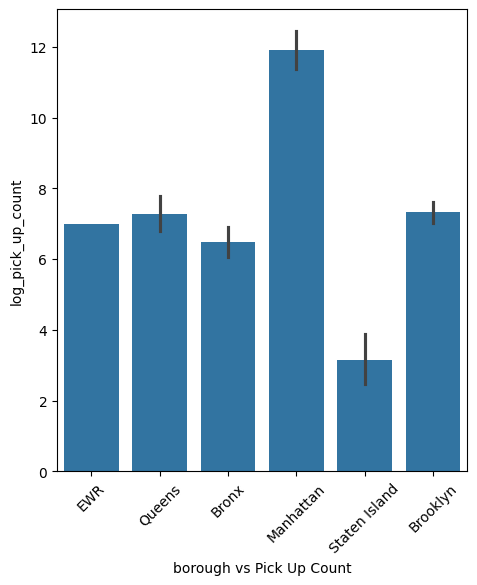

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(18, 6))
# Create a subplot in a 1x3 grid
plt.subplot(1, 3, 1)

# Using Seaborn to create a histogram plot
sns.barplot(data=pu_zone, x='borough', y='log_pick_up_count')

# Setting the label for the x-axis
plt.xlabel("borough vs Pick Up Count")
plt.xticks(rotation=45)
plt.show()  # Display the plot


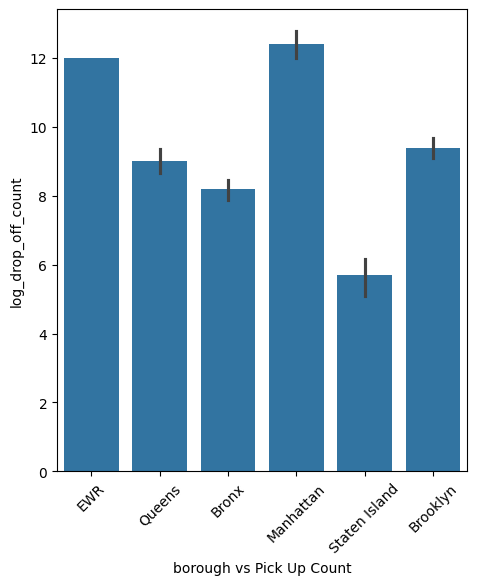

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(18, 6))
# Create a subplot in a 1x3 grid
plt.subplot(1, 3, 1)

# Using Seaborn to create a histogram plot
sns.barplot(data=do_zone, x='borough', y='log_drop_off_count')

# Setting the label for the x-axis
plt.xlabel("borough vs Pick Up Count")
plt.xticks(rotation=45)
plt.show()  # Display the plot


In [30]:
import pandas as pd

# Sample dataframes pu_zone and du_zone
# (assuming you have already loaded or created these dataframes)

# Step 1: Add a 'ride_type' column to each dataframe
pu_zone['ride_type'] = 'pick up'
do_zone['ride_type'] = 'drop off'

# Step 2: Rename columns to match the desired format
pu_zone = pu_zone.rename(columns={
    'pulocationid': 'locationid',
    'pick_up_count': 'count',
    'log_pick_up_count': 'log_count',
    'log_pick_up_count_levels': 'log_count_levels'
})

do_zone = do_zone.rename(columns={
    'dolocationid': 'locationid',
    'drop_off_count': 'count',
    'log_drop_off_count': 'log_count',
    'log_drop_off_count_levels': 'log_count_levels'
})

# Step 3: Concatenate the dataframes
combined_df = pd.concat([pu_zone, do_zone], ignore_index=True)

# Display the combined dataframe
combined_df


,locationid,season,count,zone,borough,longitude,latitude,log_count,log_count_levels,ride_type
0,1,autumn,180,Newark Airport,EWR,-74.184453,40.694996,5.0,moderate,pick up
1,1,spring,206,Newark Airport,EWR,-74.184453,40.694996,5.0,moderate,pick up
2,1,summer,209,Newark Airport,EWR,-74.184453,40.694996,5.0,moderate,pick up
3,2,autumn,5,Jamaica Bay,Queens,-73.823376,40.638987,2.0,sparse,pick up
4,2,spring,5,Jamaica Bay,Queens,-73.823376,40.638987,2.0,sparse,pick up
...,...,...,...,...,...,...,...,...,...,...
1536,262,spring,142757,Yorkville East,Manhattan,-73.943833,40.782859,12.0,busy,drop off
1537,262,summer,115957,Yorkville East,Manhattan,-73.943833,40.782859,12.0,busy,drop off
1538,263,autumn,173271,Yorkville West,Manhattan,-73.952186,40.773020,12.0,busy,drop off
1539,263,spring,189593,Yorkville West,Manhattan,-73.952186,40.773020,12.0,busy,drop off


In [ ]:
# # use it
# # # Read in the taxi zone shapefile
# # import geopandas as gpd
# # sf = gpd.read_file('/content/drive/MyDrive/Colab Notebooks/YellowTaxi/taxi_zones.shp').rename(columns=str.lower)
# # zone = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/YellowTaxi/taxi_zone_lookup.csv").rename(columns=str.lower)
# # #sf = gpd.read_file('/content/drive/MyDrive/Colab Notebooks/YellowTaxi/taxi_zones.shp')
# # #zone = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/YellowTaxi/taxi_zone_lookup.csv")
# # sf['geometry'] = sf['geometry'].to_crs('+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs')
# # Own
# pip install pandasql
# from pandasql import sqldf
# import pandas as pd
# # Read in the taxi zone shapefile
# import geopandas as gpd
# sf = gpd.read_file('/content/drive/Othercomputers/My PC/FIT5147-Data exploration and visualisation/Assessments/A1/Dataset/taxi_zones.shp').rename(columns=str.lower)
# zone = pd.read_csv("/content/drive/Othercomputers/My PC/FIT5147-Data exploration and visualisation/Assessments/A1/Dataset/taxi_zone_lookup.csv").rename(columns=str.lower)
# #sf = gpd.read_file('/content/drive/MyDrive/Colab Notebooks/YellowTaxi/taxi_zones.shp')
# #zone = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/YellowTaxi/taxi_zone_lookup.csv")
# sf['geometry'] = sf['geometry'].to_crs('+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs')

# coord = sf['geometry'].get_coordinates(index_parts=True)
# coord.index.names = ['Index','Index_1']
# df2 = sqldf('''SELECT *
# FROM coord
# where coord.Index_1 = 0''')
# sf1 = pd.merge(sf, df2, left_index=True, right_index=True)
# sf1.rename(columns={'y': 'latitude', 'x': 'longitude'}, inplace=True)
# sf1 = pd.merge(sf, df2, left_index=True, right_index=True)
# sf1.rename(columns={'y': 'latitude', 'x': 'longitude'}, inplace=True)

In [31]:
combined_df.to_csv('/content/drive/Othercomputers/My PC/FIT5147-Data exploration and visualisation/Assessments/A1/Dataset/Q1_G1_G2_Final.csv')

In [43]:
# split data according to season
yellow_winter = data_weather[data_weather['season'] == 'winter'].reset_index(drop=True)
yellow_summer = data_weather[data_weather['season'] == 'summer'].reset_index(drop=True)
yellow_spring = data_weather[data_weather['season'] == 'spring'].reset_index(drop=True)
yellow_autumn = data_weather[data_weather['season'] == 'autumn'].reset_index(drop=True)

In [42]:
yellow_winter.shape

(0, 20)

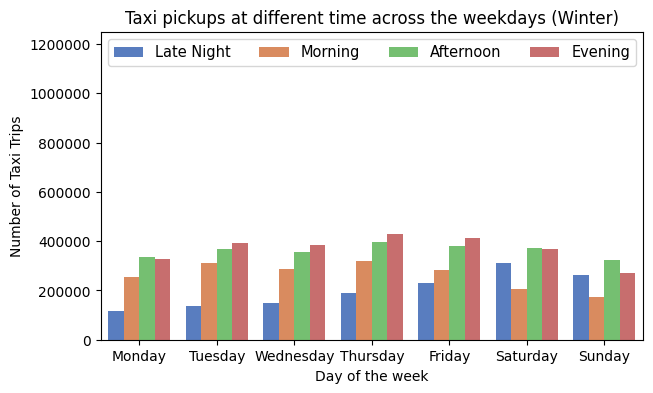

In [ ]:
#b'\n\n\n
# Compute number of pickups at each hour through out the week

# winter_pu_count = pd.crosstab(yellow_winter['weekday'], yellow_winter['time'])
# winter_pu_count = winter_pu_count.reindex(cats, axis=0)

# summer_pu_count = pd.crosstab(yellow_summer['weekday'], yellow_summer['time'])
# summer_pu_count = summer_pu_count.reindex(cats, axis=0)
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
wt = pd.crosstab(yellow_winter['weekday'], yellow_winter['time_desc']).reindex(cats, axis=0)
stacked_winter = wt.stack().reset_index().rename(columns={0:'pick_ups'})
time_order = ['Late Night', 'Morning', 'Afternoon', 'Evening']
stacked_winter.time_desc = pd.Categorical(stacked_winter.time_desc, categories=time_order)

fig, ax = plt.subplots(figsize=(7,4))
sns.barplot(x=stacked_winter.weekday, y=stacked_winter.pick_ups, hue=stacked_winter.time_desc, ax=ax, palette = 'muted')
ax.set_ylabel('Number of Taxi Trips')
ax.set_xlabel('Day of the week')
ax.set_title('Taxi pickups at different time across the weekdays (Winter)')
plt.ticklabel_format(style='plain', axis='y')
plt.ylim(0, 1250000)
plt.legend(loc=1, ncol=len(stacked_winter.time_desc), prop={'size': 10.5})
plt.show()

In [ ]:
# #pu_zone = gpd.GeoDataFrame(pd.merge(pu_count, sf, left_on='pulocationid', right_on='locationid', how = 'left')).drop('locationid', axis=1)
# # NEED THISSSSSSSSSSSSSS
# pu_winter_new = pd.DataFrame(pu_zone.merge(data_weather_subset, left_on='locationid', right_on='pulocationid', how = 'inner'))

In [34]:
#PRCP
winter_prcp = pd.DataFrame(yellow_winter.groupby(['date',  'PRCP','season']).size()).reset_index()
summer_prcp = pd.DataFrame(yellow_summer.groupby(['date',  'PRCP','season']).size()).reset_index()
winter_prcp.columns = ['date',  'PRCP','season', 'pickup_freq']
summer_prcp.columns = ['date',  'PRCP', 'season', 'pickup_freq']
#'month','time',
# AWND
winter_awnd = pd.DataFrame(yellow_winter.groupby(['date',  'AWND','season']).size()).reset_index()
summer_awnd = pd.DataFrame(yellow_summer.groupby(['date',  'AWND','season']).size()).reset_index()
winter_awnd.columns = ['date', 'AWND', 'season', 'pickup_freq']
summer_awnd.columns = ['date', 'AWND', 'season', 'pickup_freq']

# SNOW
winter_snow = pd.DataFrame(yellow_winter.groupby(['date',  'SNOW','season']).size()).reset_index()
summer_snow = pd.DataFrame(yellow_summer.groupby(['date',  'SNOW','season']).size()).reset_index()
winter_snow.columns = ['date', 'SNOW','season', 'pickup_freq']
summer_snow.columns = ['date', 'SNOW','season', 'pickup_freq']

# SNWD
winter_snwd = pd.DataFrame(yellow_winter.groupby(['date',  'SNWD','season']).size()).reset_index()
summer_snwd = pd.DataFrame(yellow_summer.groupby(['date', 'SNWD','season']).size()).reset_index()
winter_snwd.columns = ['date',  'SNWD', 'season', 'pickup_freq']
summer_snwd.columns = ['date', 'SNWD', 'season', 'pickup_freq']

In [35]:
#PRCP
spring_prcp = pd.DataFrame(yellow_spring.groupby(['date',  'PRCP','season']).size()).reset_index()
autumn_prcp = pd.DataFrame(yellow_autumn.groupby(['date', 'PRCP','season']).size()).reset_index()
spring_prcp.columns = ['date', 'PRCP', 'season', 'pickup_freq']
autumn_prcp.columns = ['date', 'PRCP', 'season', 'pickup_freq']

# AWND
spring_awnd = pd.DataFrame(yellow_spring.groupby(['date', 'AWND','season']).size()).reset_index()
autumn_awnd = pd.DataFrame(yellow_autumn.groupby(['date', 'AWND','season']).size()).reset_index()
spring_awnd.columns = ['date',  'AWND', 'season', 'pickup_freq']
autumn_awnd.columns = ['date', 'AWND',  'season', 'pickup_freq']

# SNOW
spring_snow = pd.DataFrame(yellow_spring.groupby(['date', 'SNOW','season']).size()).reset_index()
autumn_snow = pd.DataFrame(yellow_autumn.groupby(['date','SNOW','season']).size()).reset_index()
spring_snow.columns = ['date',  'SNOW', 'season', 'pickup_freq']
autumn_snow.columns = ['date', 'SNOW', 'season', 'pickup_freq']

# SNWD
spring_snwd = pd.DataFrame(yellow_spring.groupby(['date', 'SNWD','season']).size()).reset_index()
autumn_snwd = pd.DataFrame(yellow_autumn.groupby(['date', 'SNWD','season']).size()).reset_index()
spring_snwd.columns = ['date', 'SNWD', 'season', 'pickup_freq']
autumn_snwd.columns = ['date', 'SNWD', 'season',  'pickup_freq']

In [36]:
# summer_prcp.columns = ['date', 'PRCP', 'pickup_freq','season']
# summer_prcp.columns = ['date', 'PRCP', 'pickup_freq','season']
yellow_weather_data =  pd.concat([winter_prcp, winter_awnd, winter_snow, winter_snwd,summer_prcp,summer_awnd, summer_snow, summer_snwd, spring_prcp, spring_awnd, spring_snow, spring_snwd, autumn_prcp, autumn_awnd, autumn_snow, autumn_snwd]).reset_index(drop=True)

In [37]:
winter_prcp.shape, winter_awnd.shape, winter_snow.shape, winter_snwd.shape

((0, 4), (0, 4), (0, 4), (0, 4))

In [ ]:
winter_prcp.shape, winter_awnd.shape, winter_snow.shape, winter_snwd.shape

((93, 4), (93, 4), (93, 4), (93, 4))

In [ ]:
summer_prcp.shape, summer_awnd.shape, summer_snow.shape, summer_snwd.shape

((97, 4), (97, 4), (97, 4), (97, 4))

In [ ]:
spring_prcp.shape, spring_awnd.shape, spring_snow.shape, spring_snwd.shape

((103, 4), (103, 4), (103, 4), (103, 4))

In [ ]:
autumn_prcp.shape, autumn_awnd.shape, autumn_snow.shape, autumn_snwd.shape

((92, 4), (92, 4), (92, 4), (92, 4))

In [ ]:
yellow_winter_data =  pd.concat([winter_prcp, winter_awnd, winter_snow, winter_snwd])
yellow_summer_data =  pd.concat([summer_prcp, summer_awnd, summer_snow, summer_snwd])
yellow_spring_data =  pd.concat([spring_prcp, spring_awnd, spring_snow, spring_snwd])
yellow_autumn_data =  pd.concat([autumn_prcp, autumn_awnd, autumn_snow, autumn_snwd])

In [ ]:
import pandas as pd

# Assuming yellow_winter_data, yellow_spring_data, yellow_summer_data, and yellow_autumn_data are your dataframes
yellow_winter_data = pd.DataFrame(yellow_winter_data)  # Replace with your actual dataframe
yellow_spring_data = pd.DataFrame(yellow_spring_data)  # Replace with your actual dataframe
yellow_summer_data = pd.DataFrame(yellow_summer_data)  # Replace with your actual dataframe
yellow_autumn_data = pd.DataFrame(yellow_autumn_data)  # Replace with your actual dataframe

# Concatenate the dataframes
yellow_weather_data = pd.concat([yellow_winter_data, yellow_spring_data, yellow_summer_data, yellow_autumn_data])

# Display the concatenated dataframe
yellow_weather_data


,date,PRCP,season,pickup_freq,AWND,SNOW,SNWD
0,2022-12-01,0.00,winter,114501,NaN,NaN,NaN
1,2022-12-02,0.00,winter,113874,NaN,NaN,NaN
2,2022-12-03,0.49,winter,112575,NaN,NaN,NaN
3,2022-12-04,0.00,winter,96690,NaN,NaN,NaN
4,2022-12-05,0.00,winter,99369,NaN,NaN,NaN
...,...,...,...,...,...,...,...
87,2023-11-26,NaN,autumn,75228,NaN,NaN,0.0
88,2023-11-27,NaN,autumn,86832,NaN,NaN,0.0
89,2023-11-28,NaN,autumn,107409,NaN,NaN,0.0
90,2023-11-29,NaN,autumn,102474,NaN,NaN,0.0


In [47]:
yellow_weather_data['log_pickup_freq'] = np.log(yellow_weather_data['pickup_freq'] + 1)
#do_zone['log_drop_off_count'] = np.log(do_zone['drop_off_count'] + 1)
# Rounding the logarithmic values to the nearest whole number
yellow_weather_data['log_pickup_freq'] = np.round(yellow_weather_data['log_pickup_freq'])

In [48]:
#pickup_freq_counts = yellow_weather_data['pickup_freq'].value_counts()
log_pickup_freq_counts = yellow_weather_data['log_pickup_freq'].value_counts()

#print("Pickup Frequency Counts:")
#print(pickup_freq_counts)
print("\nLog Pickup Frequency Counts:")
print(log_pickup_freq_counts)


Log Pickup Frequency Counts:
log_pickup_freq
11.0    812
12.0    632
1.0      52
3.0      32
2.0       4
10.0      4
4.0       4
Name: count, dtype: int64


In [49]:
yellow_weather_data['log_pickup_freq'] = np.log(yellow_weather_data['pickup_freq'] + 1)
#do_zone['log_drop_off_count'] = np.log(do_zone['drop_off_count'] + 1)
# Rounding the logarithmic values to the nearest whole number
yellow_weather_data['log_pickup_freq'] = np.round(yellow_weather_data['log_pickup_freq'])
#do_zone['log_drop_off_count'] = np.round(do_zone['log_drop_off_count'])

# Converting  pick_up_count column into three levels
def pick_up_levels(row):
    if (row >= 1) & (row <= 4):
        val = "sparse"
    elif (row > 5) & (row <= 8):
        val = "moderate"
    else:
        val = "busy"
    return val

# Updating the datasets
#do_zone['log_drop_off_count_levels'] = do_zone['log_drop_off_count'].apply(pick_up_levels)
yellow_weather_data['log_pickup_freq_levels'] = yellow_weather_data['log_pickup_freq'].apply(pick_up_levels)

In [50]:
yellow_weather_data['month'] = yellow_weather_data['date'].dt.normalize().dt.month

In [51]:
yellow_weather_data.columns

Index(['date', 'PRCP', 'season', 'pickup_freq', 'AWND', 'SNOW', 'SNWD',
       'log_pickup_freq', 'log_pickup_freq_levels', 'month'],
      dtype='object')

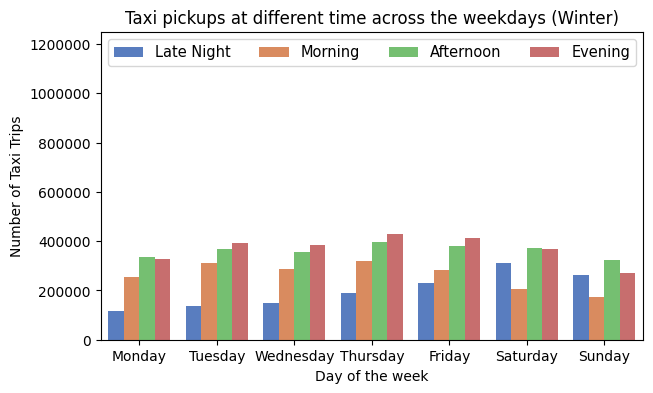

In [73]:
#b'\n\n\n
# Compute number of pickups at each hour through out the week
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
winter_pu_count = pd.crosstab(yellow_winter['weekday'], yellow_winter['time'])
winter_pu_count = winter_pu_count.reindex(cats, axis=0)

summer_pu_count = pd.crosstab(yellow_summer['weekday'], yellow_summer['time'])
summer_pu_count = summer_pu_count.reindex(cats, axis=0)

wt = pd.crosstab(yellow_winter['weekday'], yellow_winter['time_desc']).reindex(cats, axis=0)
stacked_winter = wt.stack().reset_index().rename(columns={0:'pick_ups'})
time_order = ['Late Night', 'Morning', 'Afternoon', 'Evening']
stacked_winter.time_desc = pd.Categorical(stacked_winter.time_desc, categories=time_order)

fig, ax = plt.subplots(figsize=(7,4))
sns.barplot(x=stacked_winter.weekday, y=stacked_winter.pick_ups, hue=stacked_winter.time_desc, ax=ax, palette = 'muted')
ax.set_ylabel('Number of Taxi Trips')
ax.set_xlabel('Day of the week')
ax.set_title('Taxi pickups at different time across the weekdays (Winter)')
plt.ticklabel_format(style='plain', axis='y')
plt.ylim(0, 1250000)
plt.legend(loc=1, ncol=len(stacked_winter.time_desc), prop={'size': 10.5})
plt.show()

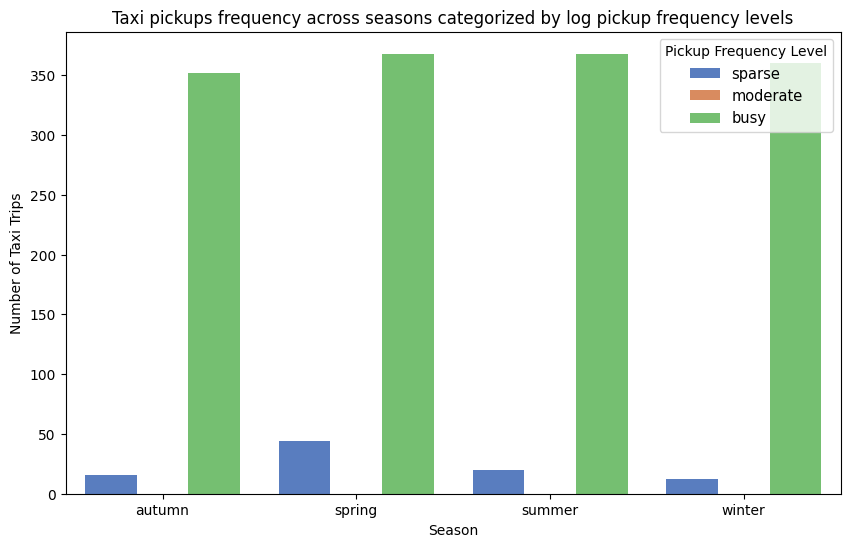

In [ ]:
seasonal_pickup_counts = yellow_weather_data.groupby(['season', 'log_pickup_freq_levels']).size().reset_index(name='pickup_counts')
log_pickup_freq_order = ['sparse', 'moderate', 'busy']
seasonal_pickup_counts['log_pickup_freq_levels'] = pd.Categorical(seasonal_pickup_counts['log_pickup_freq_levels'], categories=log_pickup_freq_order, ordered=True)
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(data=seasonal_pickup_counts, x='season', y='pickup_counts', hue='log_pickup_freq_levels', palette='muted', ax=ax)
ax.set_ylabel('Number of Taxi Trips')
ax.set_xlabel('Season')
ax.set_title('Taxi pickups frequency across seasons categorized by log pickup frequency levels')
plt.ticklabel_format(style='plain', axis='y')
plt.legend(title='Pickup Frequency Level', loc='best', prop={'size': 10.5})
plt.show()


In [ ]:
#yellow_weather_data['PRCP' == 'NaN' & 'AWND' == 'NaN', & 'SNOW' == 'NaN'& 'SNWD' == 'NaN'  ]
condition = (
    (pd.isna(yellow_weather_data['PRCP'])) &
    (pd.isna(yellow_weather_data['AWND'])) &
    (pd.isna(yellow_weather_data['SNOW'])) &
    (pd.isna(yellow_weather_data['SNWD']))
)

# Filter the dataframe based on the condition
yellow_weather_data[condition]

,date,PRCP,season,pickup_freq,AWND,SNOW,SNWD


In [ ]:
yellow_weather_data.duplicated().sum()

0

In [108]:
yellow_weather_data.to_csv('/content/drive/Othercomputers/My PC/FIT5147-Data exploration and visualisation/Assessments/A1/Dataset/yellow_weather_data_G3.csv')

In [ ]:
yellow_winter_data.head()

,date,PRCP,pickup_freq,season,AWND,SNOW,SNWD
0,2022-12-01,0.00,winter,114501,NaN,NaN,NaN
1,2022-12-02,0.00,winter,113874,NaN,NaN,NaN
2,2022-12-03,0.49,winter,112575,NaN,NaN,NaN
3,2022-12-04,0.00,winter,96690,NaN,NaN,NaN
4,2022-12-05,0.00,winter,99369,NaN,NaN,NaN


In [ ]:
# season join

In [39]:
# Identify pickup and dropoff borough data_weather
zone_df = pd.read_csv("/content/drive/Othercomputers/My PC/FIT5147-Data exploration and visualisation/Assessments/A1/Dataset/taxi_zone_lookup.csv").rename(columns=str.lower)
pu_data_airport = pd.DataFrame(pd.merge(data, zone_df[['locationid', 'borough', 'zone']], left_on='pulocationid', right_on='locationid')).drop('locationid', axis=1)
pu_data_airport = pu_data_airport.rename({'borough':'pu_borough', 'zone' : 'pu_zone'}, axis=1)
do_data_airport = pd.DataFrame(pd.merge(data, zone_df[['locationid', 'borough', 'zone']], left_on='dolocationid', right_on='locationid')).drop('locationid', axis=1)
do_data_airport = do_data_airport.rename({'borough':'do_borough', 'zone' : 'do_zone'}, axis=1)

In [ ]:
zone_df.columns

Index(['locationid', 'borough', 'zone', 'service_zone'], dtype='object')

In [21]:
pu_data_airport

,pulocationid,dolocationid,passenger_count,season,date,month,year,time,weekday,duration,day_type,time_desc,passenger_count_levels,pu_borough,pu_zone
0,170,237,1.0,winter,2022-12-01,12,2022,0,Thursday,10.000000,workday,Late Night,small,Manhattan,Murray Hill
1,170,141,1.0,winter,2022-12-01,12,2022,0,Thursday,6.400000,workday,Late Night,small,Manhattan,Murray Hill
2,170,256,1.0,winter,2022-12-01,12,2022,0,Thursday,18.400000,workday,Late Night,small,Manhattan,Murray Hill
3,170,164,1.0,winter,2022-12-01,12,2022,0,Thursday,2.966667,workday,Late Night,small,Manhattan,Murray Hill
4,170,164,1.0,winter,2022-12-01,12,2022,0,Thursday,4.883333,workday,Late Night,small,Manhattan,Murray Hill
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34246514,199,234,1.0,autumn,2023-10-23,10,2023,13,Monday,25.183333,workday,Afternoon,small,Bronx,Rikers Island
34246515,199,107,1.0,autumn,2023-11-13,11,2023,14,Monday,22.966667,workday,Afternoon,small,Bronx,Rikers Island
34246516,199,236,1.0,autumn,2023-11-30,11,2023,18,Thursday,35.033333,workday,Evening,small,Bronx,Rikers Island
34246517,176,118,4.0,spring,2023-03-04,3,2023,13,Saturday,48.533333,weekend,Afternoon,medium,Staten Island,Oakwood


In [129]:
do_data_airport

,pulocationid,dolocationid,passenger_count,season,date,month,year,time,weekday,duration,day_type,time_desc,passenger_count_levels,do_borough,do_zone
0,170,237,1.0,winter,2022-12-01,12,2022,0,Thursday,10.000000,workday,Late Night,small,Manhattan,Upper East Side South
1,132,237,1.0,winter,2022-12-01,12,2022,0,Thursday,38.166667,workday,Late Night,small,Manhattan,Upper East Side South
2,114,237,2.0,winter,2022-12-01,12,2022,0,Thursday,17.200000,workday,Late Night,small,Manhattan,Upper East Side South
3,237,237,1.0,winter,2022-12-01,12,2022,0,Thursday,11.016667,workday,Late Night,small,Manhattan,Upper East Side South
4,68,237,1.0,winter,2022-12-01,12,2022,0,Thursday,9.833333,workday,Late Night,small,Manhattan,Upper East Side South
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34246514,247,105,1.0,autumn,2023-10-05,10,2023,10,Thursday,57.050000,workday,Morning,small,Manhattan,Governor's Island/Ellis Island/Liberty Island
34246515,178,105,1.0,autumn,2023-10-11,10,2023,5,Wednesday,37.116667,workday,Late Night,small,Manhattan,Governor's Island/Ellis Island/Liberty Island
34246516,105,105,1.0,autumn,2023-10-19,10,2023,12,Thursday,14.016667,workday,Afternoon,small,Manhattan,Governor's Island/Ellis Island/Liberty Island
34246517,237,105,1.0,autumn,2023-11-14,11,2023,10,Tuesday,16.216667,workday,Morning,small,Manhattan,Governor's Island/Ellis Island/Liberty Island


In [ ]:
pu_data_airport.columns

Index(['pulocationid', 'dolocationid', 'passenger_count', 'season', 'date',
       'month', 'year', 'time', 'weekday', 'duration', 'day_type', 'time_desc',
       'passenger_count_levels', 'AWND', 'PRCP', 'SNOW', 'SNWD', 'TAVG',
       'TMAX', 'TMIN'],
      dtype='object')

In [29]:
pu_loc1 = pu_data_airport[pu_data_airport['pulocationid'] == 132]
pu_loc1['pu_zone'].value_counts()

pu_zone
JFK Airport    1793466
Name: count, dtype: int64

In [30]:
pu_loc = pu_data_airport[pu_data_airport['pulocationid'] == 138]
pu_loc['pu_zone'].value_counts()

pu_zone
LaGuardia Airport    1221607
Name: count, dtype: int64

In [25]:
# pu_data_airport[pu_data_airport['pulocationid'] == 132 & (pu_data_airport['pu_zone'] == 'JFK Airport')]

,pulocationid,dolocationid,passenger_count,season,date,month,year,time,weekday,duration,day_type,time_desc,passenger_count_levels,pu_borough,pu_zone


In [58]:
# pu = pu_data_airport[ (pu_data_airport['pulocationid'] == 132) & (pu_data_airport['pu_borough'] == 'JFK')]
# pu

,pulocationid,dolocationid,passenger_count,season,date,month,year,time,weekday,duration,day_type,time_desc,passenger_count_levels,pu_borough,pu_zone


In [37]:
#Ques 3
# pu_data_airport.loc[pu_data_airport['pulocationid'] == 132, 'PUborough'] = 'JFK'
# pu_data_airport.loc[pu_data_airport['pulocationid'] == 138, 'PUborough'] = 'LaGuardia'
#pu_data_airport = pu_data_airport[((pu_data_airport['pulocationid'] == 132) & (pu_data_airport['pu_zone'] == 'JFK Aiprort')) | ((pu_data_airport['pulocationid'] == 138) & (pu_data_airport['pu_zone'] == 'LaGuardia Airport'))]
#data = data[(data['pulocationid'] >= 1) & (data['pulocationid'] <= 263) & (data['dolocationid'] >= 1) & (data['dolocationid'] <= 263)]


In [40]:
pu_data_airport_please = pu_data_airport[(pu_data_airport['pulocationid'] == 132) | (pu_data_airport['pulocationid'] == 138)]

In [41]:
pu_data_airport_please

,pulocationid,dolocationid,passenger_count,season,date,month,year,time,weekday,duration,day_type,time_desc,passenger_count_levels,pu_borough,pu_zone
5530423,138,255,1.0,winter,2022-12-01,12,2022,0,Thursday,18.616667,workday,Late Night,small,Queens,LaGuardia Airport
5530424,138,230,1.0,winter,2022-12-01,12,2022,0,Thursday,25.000000,workday,Late Night,small,Queens,LaGuardia Airport
5530425,138,164,4.0,winter,2022-12-01,12,2022,0,Thursday,21.266667,workday,Late Night,medium,Queens,LaGuardia Airport
5530426,138,56,1.0,winter,2022-12-01,12,2022,0,Thursday,14.566667,workday,Late Night,small,Queens,LaGuardia Airport
5530427,138,164,1.0,winter,2022-12-01,12,2022,0,Thursday,26.600000,workday,Late Night,small,Queens,LaGuardia Airport
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13932804,132,239,1.0,autumn,2023-11-30,11,2023,23,Thursday,38.033333,workday,Late Night,small,Queens,JFK Airport
13932805,132,263,1.0,autumn,2023-11-30,11,2023,23,Thursday,28.700000,workday,Late Night,small,Queens,JFK Airport
13932806,132,263,1.0,autumn,2023-11-30,11,2023,23,Thursday,23.950000,workday,Late Night,small,Queens,JFK Airport
13932807,132,74,1.0,autumn,2023-11-30,11,2023,23,Thursday,27.350000,workday,Late Night,small,Queens,JFK Airport


In [42]:
pu_data_airport_please.columns

Index(['pulocationid', 'dolocationid', 'passenger_count', 'season', 'date',
       'month', 'year', 'time', 'weekday', 'duration', 'day_type', 'time_desc',
       'passenger_count_levels', 'pu_borough', 'pu_zone'],
      dtype='object')

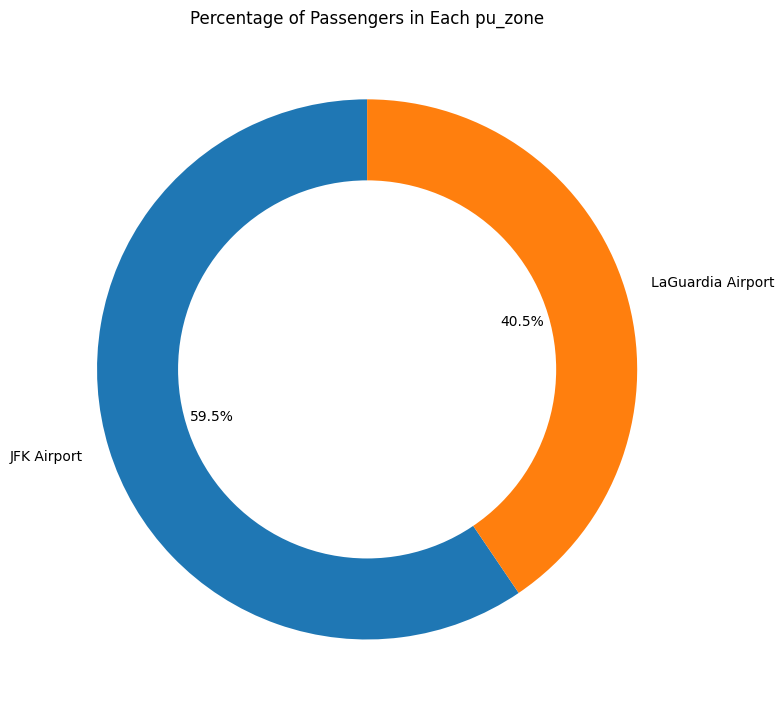

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming pu_data_airport is your DataFrame containing the data
# Let's calculate the percentage of passengers in each pu_zone
pu_zone_counts = pu_data_airport_please['pu_zone'].value_counts()
total_passengers = pu_zone_counts.sum()
percentage_passengers = (pu_zone_counts / total_passengers) * 100

# Plotting
plt.figure(figsize=(8, 8))
plt.pie(percentage_passengers, labels=percentage_passengers.index, autopct='%1.1f%%', startangle=90)

# Draw a circle at the center of pie to make it look like a donut
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()
plt.title('Percentage of Passengers in Each pu_zone')
plt.show()


In [54]:
pu_data_airport_please.to_csv('/content/drive/Othercomputers/My PC/FIT5147-Data exploration and visualisation/Assessments/A1/Dataset/pu_data_G4.csv')

In [47]:
do_data_airport_please = do_data_airport[(do_data_airport['pulocationid'] == 132) | (do_data_airport['pulocationid'] == 138)]

In [48]:
do_data_airport_please[['pulocationid', 'dolocationid', 'passenger_count', 'season','do_borough', 'do_zone']]

,pulocationid,dolocationid,passenger_count,season,do_borough,do_zone
1,132,237,1.0,winter,Manhattan,Upper East Side South
11,132,237,1.0,winter,Manhattan,Upper East Side South
18,138,237,1.0,winter,Manhattan,Upper East Side South
24,132,237,1.0,winter,Manhattan,Upper East Side South
26,138,237,1.0,winter,Manhattan,Upper East Side South
...,...,...,...,...,...,...
34246494,132,2,1.0,autumn,Queens,Jamaica Bay
34246496,132,2,1.0,autumn,Queens,Jamaica Bay
34246497,132,2,2.0,autumn,Queens,Jamaica Bay
34246500,132,2,1.0,autumn,Queens,Jamaica Bay


In [ ]:
do_data_airport_please.to_csv('/content/drive/Othercomputers/My PC/FIT5147-Data exploration and visualisation/Assessments/A1/Dataset/do_data_G5.csv')

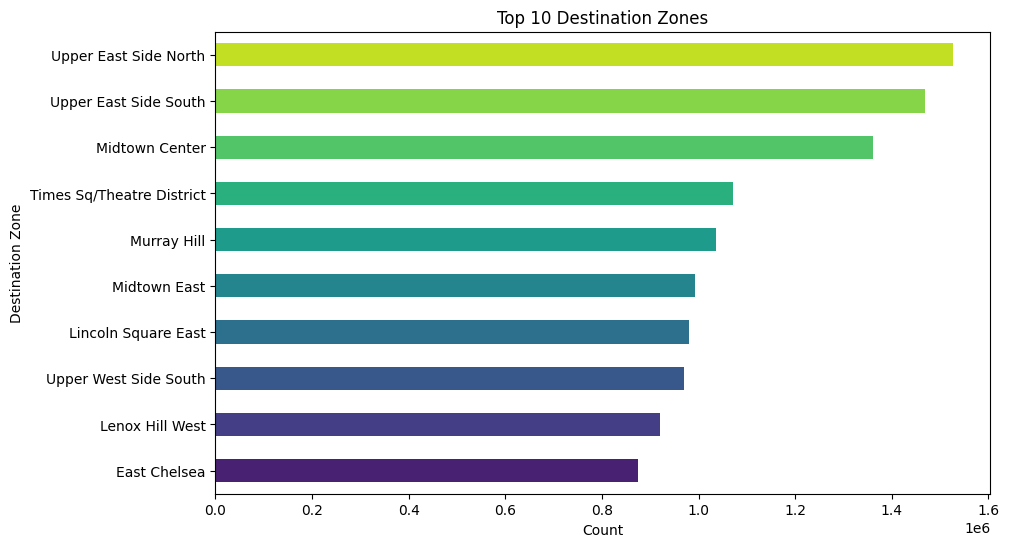

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming do_data_airport is your DataFrame containing the data
# Selecting relevant columns
selected_columns = ['pulocationid', 'dolocationid', 'passenger_count', 'season', 'do_borough', 'do_zone']
data = do_data_airport[selected_columns]

# Grouping by 'do_zone' and getting top 10 zones
top_10_do_zones = data['do_zone'].value_counts().nlargest(10)

# Sort the Series in descending order
top_10_do_zones = top_10_do_zones.sort_values(ascending=True)

# Plotting
plt.figure(figsize=(10, 6))

# Assigning colors with dominant color highly pigmented
colors = sns.color_palette('viridis', len(top_10_do_zones))

# Plotting horizontal bar chart
top_10_do_zones.plot(kind='barh', color=colors)

plt.xlabel('Count')
plt.ylabel('Destination Zone')
plt.title('Top 10 Destination Zones')
plt.show()


In [56]:
pu_data_airport.head()

,pulocationid,dolocationid,passenger_count,season,date,month,year,time,weekday,duration,day_type,time_desc,passenger_count_levels,pu_borough,pu_zone


In [ ]:
pu_data_airport.head()

,pulocationid,dolocationid,passenger_count,season,date,month,year,time,weekday,duration,...,time_desc,passenger_count_levels,AWND,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,PUborough
0,230,170,2.0,winter,2023-11-30,11,2023,23,Thursday,9.933333,...,Late Night,small,5.82,0.0,0.0,0.0,5.833333,10.555556,1.111111,NaN
1,249,229,1.0,winter,2023-11-30,11,2023,23,Thursday,15.616667,...,Late Night,small,5.82,0.0,0.0,0.0,5.833333,10.555556,1.111111,NaN
2,230,90,1.0,winter,2023-11-30,11,2023,23,Thursday,8.633333,...,Late Night,small,5.82,0.0,0.0,0.0,5.833333,10.555556,1.111111,NaN
3,186,249,1.0,winter,2023-11-30,11,2023,23,Thursday,7.616667,...,Late Night,small,5.82,0.0,0.0,0.0,5.833333,10.555556,1.111111,NaN
4,68,186,1.0,winter,2023-11-30,11,2023,23,Thursday,5.300000,...,Late Night,small,5.82,0.0,0.0,0.0,5.833333,10.555556,1.111111,NaN
